## Booking prediction

https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Complexity_Learning_curves/Complexity_Learning_Analysis_Lending_Data.ipynb

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Minha parte: Decision tree



## Pontos esperados:
1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.;

2) Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;

3) Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;

4) Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?

5) Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.

6) Que outras bases externas ou internas voce buscaria para enriquecer as análises?

7) Quais os pré-processamentos aplicados e o porquê.

8) Quais modelos escolhidos e o porquê da escolha desses modelos.

9) Quais outras melhorias poderiam ser feitas tanto nos dados quanto em relação à modelagem?

10) Quais métricas foram escolhidas e o porquê.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Split**:
- Train-test split

**Cleaning**:
- dropar columnas que não fazem sentido
- remover duplicados
- remover linhas baseado em algum critério de filtro
- remover outliers
- remover valores errados
- mudar os datatypes (str, int, float)
- marcar missings como NAN
A etapa de limpeza dos dados deve vir antes de imputar valores missing e do one-hot-encoding.

**Imputing Missing Values**:
- SimpleImputer (média, media, moda)
- KNNImputer
- IterativeImputer
O Imputing deve ser feito ANTES do One-Hot-Encoding (tanto que ele não aceita valores nans).

**Transform features**:
- Features Categóricas:
    - OrdinalEncoder
    - LabelEncoder
    - One-Hot-Encoding
- Features Numéricas:
    - Binarizer
    - KBinsDiscretizer
    - MinMaxScale
    - StandardScale
    - RobustScale
Os dados nans e tipos de colunas devem ter sido tratados antes desse processo.

**Feature Engineering**:
- PolynomialFeatures
- PowerTransformer
- Agregação de Features

**Feature Selection**:
- Univariate statistical tests
- Recursive Feature Elimination (RFE)
- Mutual_info_classif
- Variance inflation factor (VIF)

In [85]:
df = pd.read_csv("hotel_bookings.csv")
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [63]:
# Remover colunas que não fazem sentido
df.hotel.value_counts(normalize = True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

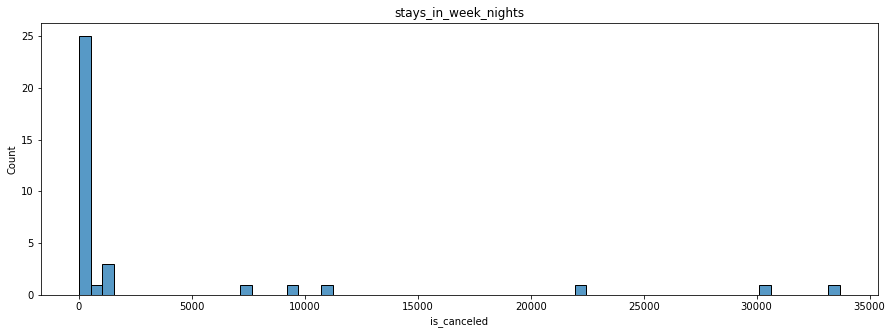

In [78]:
plt.figure(figsize=(15,5))
i = "stays_in_week_nights"
_ = pd.concat([df[i], df["is_canceled"]], axis = 1)
saz = _.groupby(i)["is_canceled"].count()
sns.histplot(x = saz)
plt.title(i)
plt.show()

In [87]:
pd.DataFrame(df.corr().iloc[:,0])

,is_canceled
is_canceled,1.000000
lead_time,0.293123
arrival_date_year,0.016660
arrival_date_week_number,0.008148
arrival_date_day_of_month,-0.006130
stays_in_weekend_nights,-0.001791
stays_in_week_nights,0.024765
adults,0.060017
children,0.005048
babies,-0.032491


In [ ]:
# quais países

In [ ]:
# ticket médio (adr : average daily rate-> gastos por dia)

In [ ]:
# 

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head(1)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
67702,City Hotel,64,2017,May,18,6,2,1,3,0.0,...,9.0,NaN,0,Transient,189.0,0,0,Canceled,2017-03-13,1


In [52]:
# Gabriel #############################################################
# Decision Tree
#######################################################################

# Após fazer o train_test_split():

# Concatenar com y_train e fazer as limpezas abaixo

# Cleaning

# Verificar nulls
df_train.isna().sum().sum()

# Dropar as colunas que não precisamos
# Dropar 'company': 112593 NaN/119390 = 0.9431
df_train.drop("company", axis = 1, inplace = True)

# Dropar reservas para zero pessoas
filter = (df_train.children == 0) & (df_train.adults == 0) & (df_train.babies == 0)
df_train = df_train[~filter]

# Dropar 'agent': Possui muitos NaNs e seus valores são os IDs dos agentes
df_train.drop("agent", axis = 1, inplace = True)

# Dropar linhas "children" (4 linhas) e "country" (478 linhas) que contém NaNs
df_train.dropna(inplace = True)

# Construindo uma feature "full_date". 
df1 = pd.DataFrame(df_train,columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'])
df_train["full_date"] = df1["arrival_date_year"].map(str) + " " + df1["arrival_date_month"] + " " + df1["arrival_date_day_of_month"].map(str)
df_train["full_date"]

# Dropar as features já usadas
df_train.drop(columns = ["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis = 1, inplace = True)

# Converter "full_date" para datetime
from datetime import datetime
df_train['full_date'] = pd.to_datetime(df_train['full_date'])

# stays_in_full = stays_in_weekend_nights + stays_in_week_nights
df_train["stays_in_full"] = df_train["stays_in_weekend_nights"] + df_train["stays_in_week_nights"]

# o que seria is_weekend?
df_train["is_weekend"] = np.where(df_train["stays_in_weekend_nights"]>0, 1, 0)

# Dropar as features já usadas
df_train.drop(columns = ["stays_in_weekend_nights", "stays_in_week_nights"], axis = 1, inplace = True)

# guest_total
df_train["guest_total"] = df_train["children"] + df_train["adults"] + df_train["babies"]

# Dropar as features já usadas
df_train.drop(columns = ["children", "adults", "babies"], axis = 1, inplace = True)

# previous_bookings_total = previous_cancellations + previous_bookings_not_canceled
# Acho que a taxa de cancelamento é mais informativo que o total
# X_train["previous_bookings_total"] = X_train["previous_cancellations"] + X_train["previous_bookings_not_canceled"]
df_train["cancellation_rate"] = df_train["previous_cancellations"]/(df_train["previous_cancellations"] + df_train["previous_bookings_not_canceled"])
df_train["cancellation_rate"].replace({np.nan: 0}, inplace = True)


# Dropar as features já usadas
df_train.drop(columns = ["previous_cancellations", "previous_bookings_not_canceled"], axis = 1, inplace = True)

# Próximos passos
# - Remover outras colunas que não importam (talvez fazer uma correlação para verificar)
# - Remover outliers
# - alterar datatypes

# -----------------------------------------------
# Dados desbalanceados
# Fazer Imputer (ver com o Kuma sobre o meio termo de under e oversampling) - SMOTEENN??

# -----------------------------------------------
# Transform features
# Features categóricas
# - One-Hot-Encoding acredito que é suficiente, mas verificar se a feature não tem muitos valores únicos
# Features numéricas
# - Binarizer (binário)
# - StandardScaler (outros dados)1
# ------------------------------------------------
# Após isso, acho q é suficiente fazer o DecisionTree (Não vamos usar feature engineering nem feature selection)

#from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instância modelo de classificação - sem otimização
#model = DecisionTreeClassifier().fit(X_train, y_train)

# Fazer com CV - KFold e .cross_validate() - definir as métricas (acurácia e f1??)

# Fazer com tunning de RandomizedSearchCV() e GridSearchCV() - quais hiperparâmetros??

# classification_report de todos

In [53]:
df_train.head(2)

,hotel,lead_time,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled,full_date,stays_in_full,is_weekend,guest_total,cancellation_rate
67702,City Hotel,64,18,BB,GBR,Online TA,TA/TO,0,D,D,...,0,0,Canceled,2017-03-13,1,2017-05-06,3,1,3.0,NaN
115851,City Hotel,34,28,BB,FRA,Direct,Direct,0,A,A,...,0,0,Check-Out,2017-07-12,0,2017-07-10,2,1,3.0,NaN


In [54]:
df_train.columns

Index(['hotel', 'lead_time', 'arrival_date_week_number', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_canceled',
       'full_date', 'stays_in_full', 'is_weekend', 'guest_total',
       'cancellation_rate'],
      dtype='object')

In [57]:
# O que mais excluir de categóricos?
df_train_cat = df_train.select_dtypes(exclude = np.number)
df_train_cat

# hotel : 2
# meal : 5
# country : 174 - Retirar
# market_segment: 7 - Retirar
# distribution_channel: 4
# reserved_room_type: 9
# assigned_room_type : 10
# deposit_type : 3
# customer_type : 4
# reservation_status : 3
# reservation_status_date : 919 - Retirar
# full_date : 793 - Retirar

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,full_date
67702,City Hotel,BB,GBR,Online TA,TA/TO,D,D,No Deposit,Transient,Canceled,2017-03-13,2017-05-06
115851,City Hotel,BB,FRA,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2017-07-12,2017-07-10
57345,City Hotel,BB,ESP,Online TA,TA/TO,F,F,No Deposit,Transient,Canceled,2016-09-16,2016-09-24
11622,Resort Hotel,BB,FRA,Direct,Direct,E,E,No Deposit,Transient,Canceled,2016-09-12,2017-05-21
33333,Resort Hotel,BB,GBR,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-02-20,2017-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...
76820,City Hotel,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2016-07-09,2016-07-08
110268,City Hotel,BB,AUT,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-04-25,2017-04-20
103694,City Hotel,BB,ITA,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-12-30,2016-12-27
860,Resort Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-05-19,2015-08-01


In [79]:
df_train_cat["reservation_status"].unique()

array(['Canceled', 'Check-Out', 'No-Show'], dtype=object)